# 0.2_ss_chap3
chapter3 の実装

In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
%reload_ext autoreload

In [3]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

In [5]:
def step_function(x):
    ''' Simple step function
    '''
    y = x > 0
    return y.astype(np.int)

In [6]:
def step_function(x):
    ''' Step function to return np.arrays
    '''
    return np.array(x > 0, dtype=np.int)

### Step functionの見た目


(-0.1, 1.1)

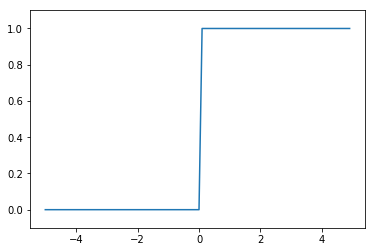

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

### Sigmoid 関数の見た目

In [8]:
def sigmoid(x):
    ''' Simple sigmoid function
    '''
    return 1/(1+np.exp(-x))

In [9]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [10]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t
1.0/t

array([1.        , 0.5       , 0.33333333])

(-0.1, 1.1)

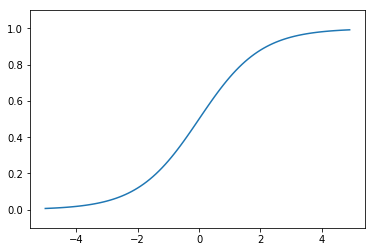

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

In [12]:
def plot_activation(activation_function, x = np.arange(-5.0, 5.0, 0.1)):
    ''' Plot activation function
    '''
    y = activation_function(x)
    plt.plot(x, y)
    plt.ylim(-0.1, 1.1)
    return plt.show()

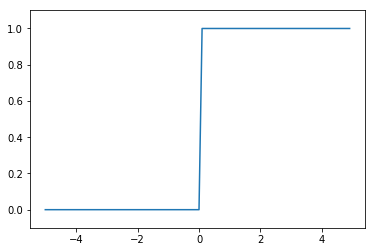

In [13]:
plot_activation(step_function)

(-0.1, 1.1)

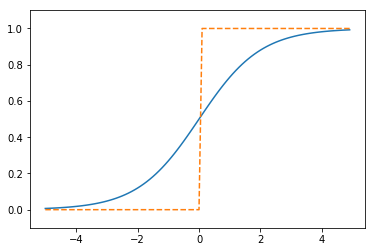

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y)
plt.plot(x, y2, linestyle="--")
plt.ylim(-0.1, 1.1)

In [15]:
def relu(x):
    ''' Simple relu
    '''
    return np.maximum(0, x)

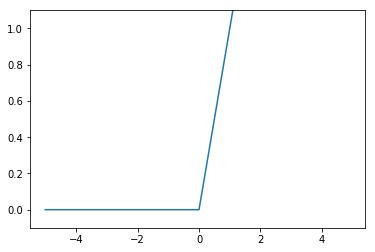

In [16]:
plot_activation(relu)

## Matrices

In [17]:
X = np.array([1,2])
X.shape
W = np.array([[1,3,5], [2,4,6]])
W
W.shape
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

In [18]:
# 1つのバイアスと２つの重みを受け取って、３つにして返す（2行3列）
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [19]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [20]:
# ３つの重みを受け取って、２つにして返す（3行2列）
W2 = np.array([[0.1, 0.4], [.2, .5], [.3, .6]])
B2 = np.array([.1, .2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [21]:
def identity_function(x):
    ''' Return itself
    '''
    return x

In [22]:
# ２つの重みを受け取って、２つにして返す（2行2列)
W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])
A3 = np.dot(Z2, W3)
Y = identity_function(A3)
Y

array([0.21682708, 0.49627909])

In [23]:
def init_network():
    ''' ネットワークの初期化
    
    '''
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [.2, .5], [.3, .6]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['b3'] = np.array([.1, .2])
    
    return network

In [24]:
def forward(network, x):
    ''' ネットワークを計算する
    '''
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [25]:
network = init_network()
x = np.array([1., .5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# Output

In [26]:
a = np.array([.3, 2.9, 4.])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [27]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [28]:
y = exp_a/sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [29]:
def softmax(a):
    ''' Simple softmax
    '''
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

## Overflow

In [30]:
a = np.array([1010, 1000, 990])
softmax(a)
c = np.max(a)
a-c
softmax(a-c)

/Users/shouta_shimizu/.pyenv/versions/3.7.0/envs/deep-learning-from-scratch/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/shouta_shimizu/.pyenv/versions/3.7.0/envs/deep-learning-from-scratch/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### Softmax with overflow

In [31]:
def softmax(a):
    ''' Softmax with overflow
    '''
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [32]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# Mnist

In [35]:
import sys, os
sys.path.append(os.pardir)
from src.dataset.mnist import load_mnist

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [38]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(t_train)

[5 0 4 ... 5 6 8]


In [40]:
print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
print(t_test)

[7 2 1 ... 4 5 6]


In [44]:
x_test.sum().sum()

264923200

In [46]:
from PIL import Image

In [59]:
def img_show(img):
        pil_img = Image.fromarray(np.uint8(img))
        pil_img.show()

In [48]:
img = x_train[0]

In [49]:
label = t_train[0]

In [50]:
label

5

In [51]:
print(img.shape)

(784,)


In [53]:
print(img.shape)

(28, 28)


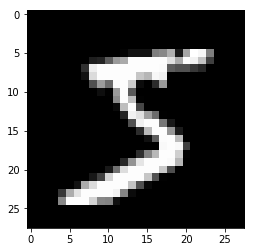

In [63]:
plt.gray()
plt.imshow(img, interpolation='nearest')

In [88]:
from src.ch03.neuralnet_mnist import get_data, init_network, predict

In [71]:
x, t = get_data()

In [89]:
network = init_network()
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [87]:
accuracy_count = 0

In [97]:
%%time
for i in range(len(x)):
        y = predict(network, x[i])
        p = np.argmax(y)
        
        if p == t[i]:
                accuracy_count += 1

CPU times: user 767 ms, sys: 69.2 ms, total: 836 ms
Wall time: 474 ms


In [93]:
logging.info("Accuracy:" + str(float(accuracy_count) / len(x)))

2018-11-03 12:35:18,580 - root - INFO - Accuracy:0.9352


In [98]:
%%time
batch_size = 100
accuracy_count = 0
for i in range(0, len(x), batch_size):
        x_batch = x[i: i+batch_size]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_count += np.sum(p == t[i:i+batch_size])

CPU times: user 109 ms, sys: 8.16 ms, total: 117 ms
Wall time: 82 ms


In [99]:
logging.info("Accuracy:" + str(float(accuracy_count) / len(x)))

2018-11-03 12:58:34,773 - root - INFO - Accuracy:0.9352
